# Clustering

In [1]:
  # Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [14]:
import warnings
warnings.filterwarnings("ignore")

# Clasificación vs Clustering

In [2]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Saving figure classification_vs_clustering_plot


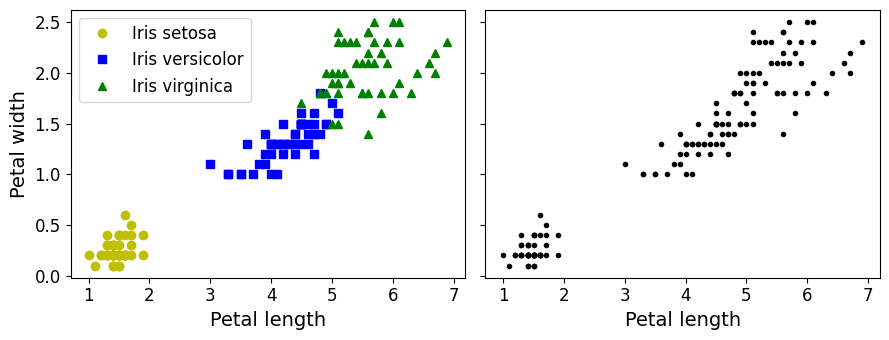

In [3]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

save_fig("classification_vs_clustering_plot")
plt.show();

## K-means 

**Documentación**: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans


**NOTA**: En problemas reales, es fundamental **estandarizar o escalar los datos** antes de aplicar el algoritmo k-means

In [5]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=101)
y_pred = kmeans.fit_predict(X)

C:\ProgramData\anaconda3\envs\general\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\envs\general\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

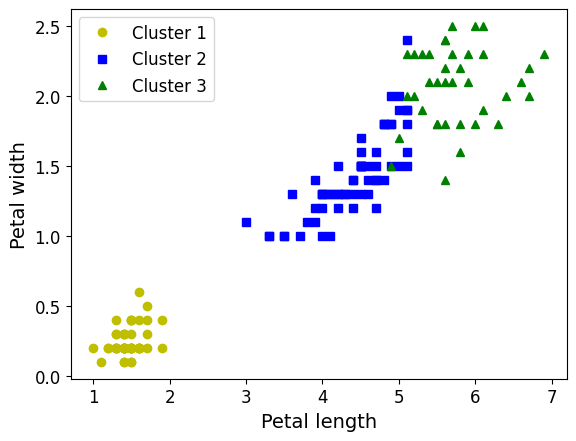

In [6]:
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [10]:
# Generamos otro dataset
from sklearn.datasets import make_blobs
blob_centroides = np.array([[0.2, 2.3],
                            [-1.5, 2.3],
                            [-2.8, 1.8],
                            [-2.8,2.8],
                            [-2.8, 1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [11]:
X, y = make_blobs(n_samples = 2000,
                 centers = blob_centroides,
                 cluster_std = blob_std,
                 random_state=7)

Saving figure blobs_plot


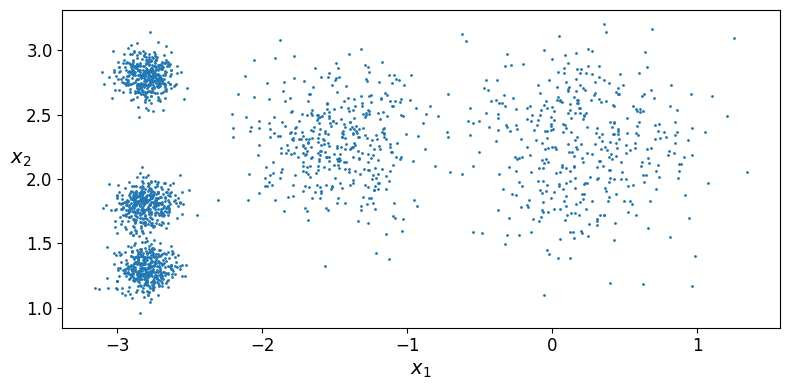

In [12]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
plt.figure(figsize=(8, 4))
plot_clusters(X)
save_fig("blobs_plot")
plt.show()

Entrena un k-means con los datos anteriores

In [15]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [16]:
# Predicciones
new_point = [[-2, 3]]
kmeans.predict(new_point)

array([2])

In [17]:
# Centroides
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [18]:
# Predecir varios puntos
X_new = np.array([[0,2],
                 [3,2],
                 [-3,3]])
kmeans.predict(X_new)

array([1, 1, 2])

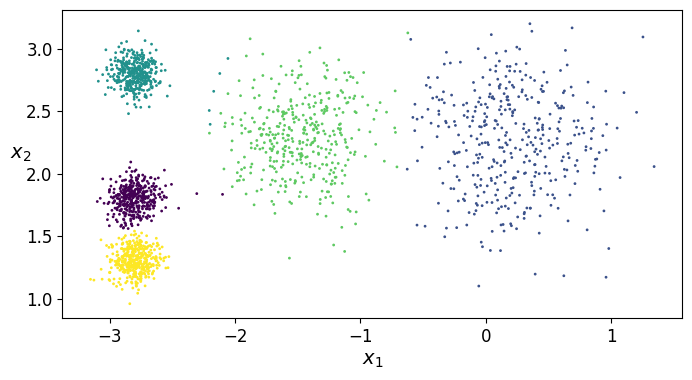

In [19]:
plt.figure(figsize=(8,4))
plot_clusters(X, y=kmeans.predict(X))
plt.show()

Podemos pintar las regiones de decisión (diagrama de Voronoi)

In [20]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='r'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=30, linewidths=30,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure voronoi_plot


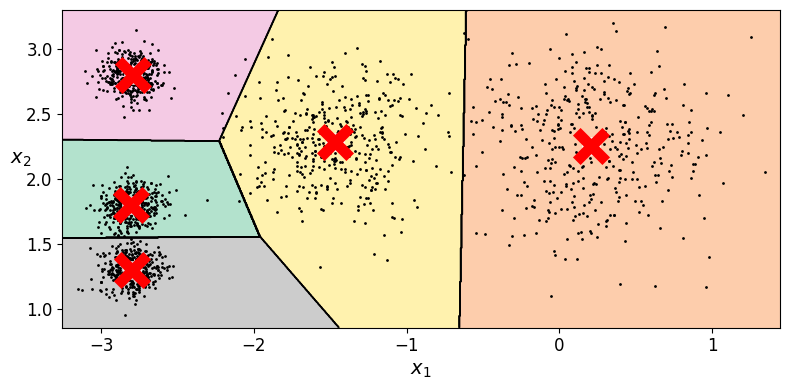

In [21]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

El método `transform` Mide la distancia a cada uno de los centroides

In [22]:
X_new

array([[ 0,  2],
       [ 3,  2],
       [-3,  3]])

In [23]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031]])

**Do it yourself**: Calcula la distancia euclídea de cada punto de `X_new` a cada centroide

In [26]:
for p in X_new:
    for c in kmeans.cluster_centers_:
        print(np.sqrt((p[0]-c[0])**2+(p[1]-c[1])**2))
    print('\n')

2.8109363340492246
0.32995316737902747
2.904234396532138
1.4943903428779728
2.8863390087869387


5.8073005809505185
2.802907554209143
5.847392225305731
4.475933204313692
5.842363513114284


1.2147535234633555
3.2939976775863724
0.29040966380828565
1.6913663090260858
1.7108603114762786




### Inertia 

Uno de los parámetros de kmeans era el número de ejecuciones del algoritmo (`n_init`). Para seleccionar el mejor modelo, necesitamos evaluar el desempeño de cada uno. Al no tener variable objetivo, lo único que podemos medir es la suma de las distancias entre cada punto y su centroide (métrica de inercia). El algoritmo con menor inercia será el elegido


In [28]:
kmeans.inertia_

211.59853725816836

**Do it yourself**: Usando `kmeans.transform(X)` y `kmeans.labels_` comprueba que la inercia es la suma de las distancias al cuadrado de cada punto a su centroide

In [29]:
kmeans.transform(X)

array([[0.46779778, 3.04611916, 1.45402521, 1.54944305, 0.11146795],
       [0.07122059, 3.11541584, 0.99002955, 1.48612753, 0.51431557],
       [3.81713488, 1.32016676, 4.09069201, 2.67154781, 3.76340605],
       ...,
       [0.92830156, 3.04886464, 0.06769209, 1.40795651, 1.42865797],
       [3.10300136, 0.14895409, 3.05913478, 1.71125   , 3.23385668],
       [0.22700281, 2.8625311 , 0.85434589, 1.21678483, 0.67518173]])

In [30]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

In [33]:
iner = 0
for k in range(len(kmeans.labels_)):
    dist = kmeans.transform(X)[k]
    centroide = kmeans.labels_[k]
    iner += dist[centroide]**2
iner

211.59853725816814

El método `score()` devuelve el negativo de la inercia. ¿Por qué negativo? Porque se respeta la regla "_cuanto mayor, mejor_" de sklearn 


In [34]:
kmeans.score(X)

-211.59853725816834

### Buscando el número óptimo de clusters

In [35]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

In [36]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

Saving figure bad_n_clusters_plot


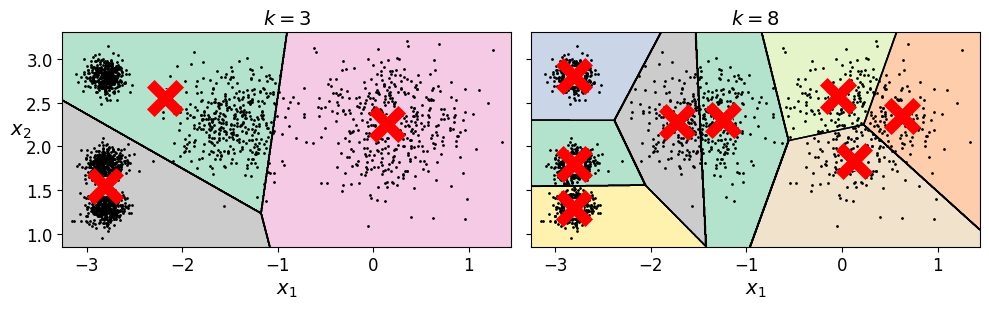

In [37]:
plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
save_fig("bad_n_clusters_plot")
plt.show()

In [39]:
# Miramos las inercias
kmeans_k3.inertia_

653.2167190021551

In [40]:
kmeans_k8.inertia_

119.11983416102875

Para elegir el número óptimo de clusters, **no** podemos simplemente elegir el valor de *k* que minimice la inercia, porque ésta va disminuyendo a medida que incrementamos *k*. Podemos hacer un plot de la inercia en función de *k* y analizar la curva

In [42]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(2,10)]
inertias = [model.inertia_ for model in kmeans_per_k]
inertias

[1149.6140723750277,
 653.2167190021552,
 261.79677785694696,
 211.59853725816836,
 169.23715382893542,
 141.383364895685,
 119.11983416102876,
 102.59678718476381]

Saving figure inertia_vs_k_plot


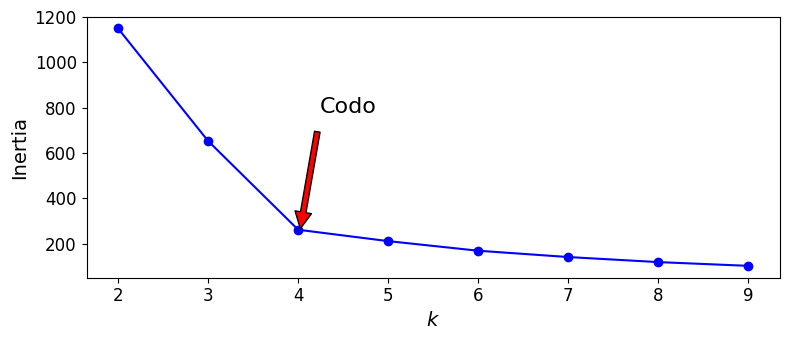

In [43]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Codo',
             xy=(4, inertias[3]),
             xytext=(0.4, 0.65),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='red', shrink=0.1)
            )

save_fig("inertia_vs_k_plot")
plt.show()

In [44]:
kmeans_k4 = KMeans(n_clusters=4, random_state=42)
kmeans_k5 = KMeans(n_clusters=5, random_state=42)

Saving figure k4_k5_comparison


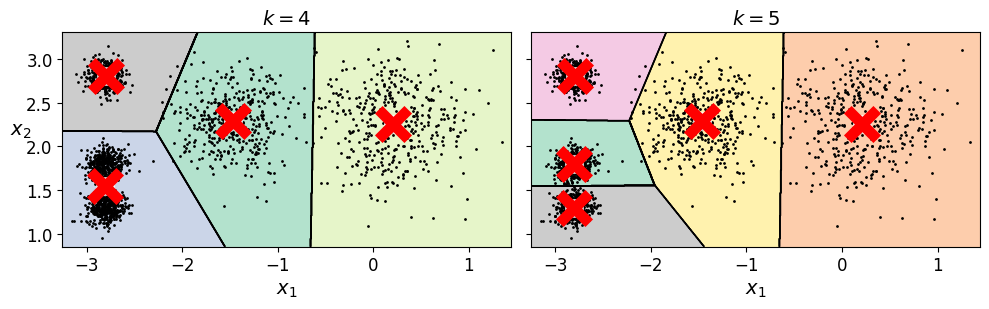

In [45]:
plot_clusterer_comparison(kmeans_k4, kmeans_k5, X, "$k=4$", "$k=5$")
save_fig("k4_k5_comparison")
plt.show()

Otra forma de elegir el número de clusters es mediante el *silhouette score*, que consiste en la media de los coeficientes *silhouette* sobre todos los puntos. Este coeficiente se calcula como $(b-a)/\max(a,b)$, siendo $a$ la distancia media de los puntos en el mismo cluster (distancia intra-cluster), y $b$ la distancia media al cluster más cercano 

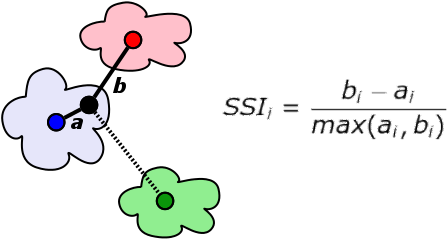

Este coeficiente varía entre -1 y 1. Cuanto más próximo sea a +1 quiere decir que el punto está bien situado dentro de su cluster y está alejado de otros clusters. 

Un coeficiente igual a 0 indica que está cercano a una frontera entre clusters, y un coeficiente igual a -1 indica que el punto puede haber sido asignado a un cluster erróneo

In [46]:
from sklearn.metrics import silhouette_score

In [47]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [48]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k]

Saving figure silhouette_score_vs_k_plot


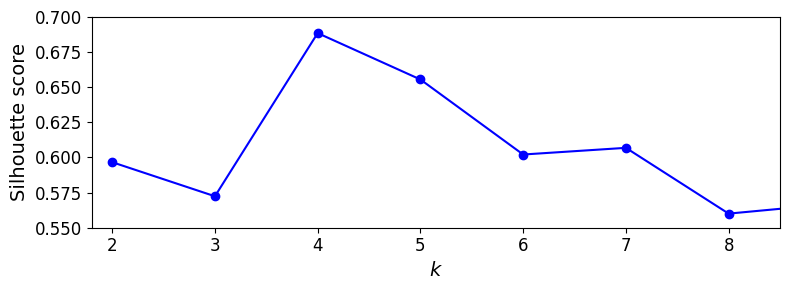

In [49]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
save_fig("silhouette_score_vs_k_plot")
plt.show()

Esta visualización aporta más información que la anterior. Se confirma que $k=4$ es muy buena opción, también indica que $k=5$ es también buena.  

Existen también los diagramas de siluetas, donde el eje *y* representa cada cluster y el eje *x* es el coeficiente de silhouette. La anchura de cada "cuchillo" indica el número de puntos en cada cluster, y el contorno del "cuchillo" son los puntos con diferentes coeficientes. Hay que buscar cuchillos poco afilados, homogéneos y que superen la media del coeficiente


Saving figure silhouette_analysis_plot


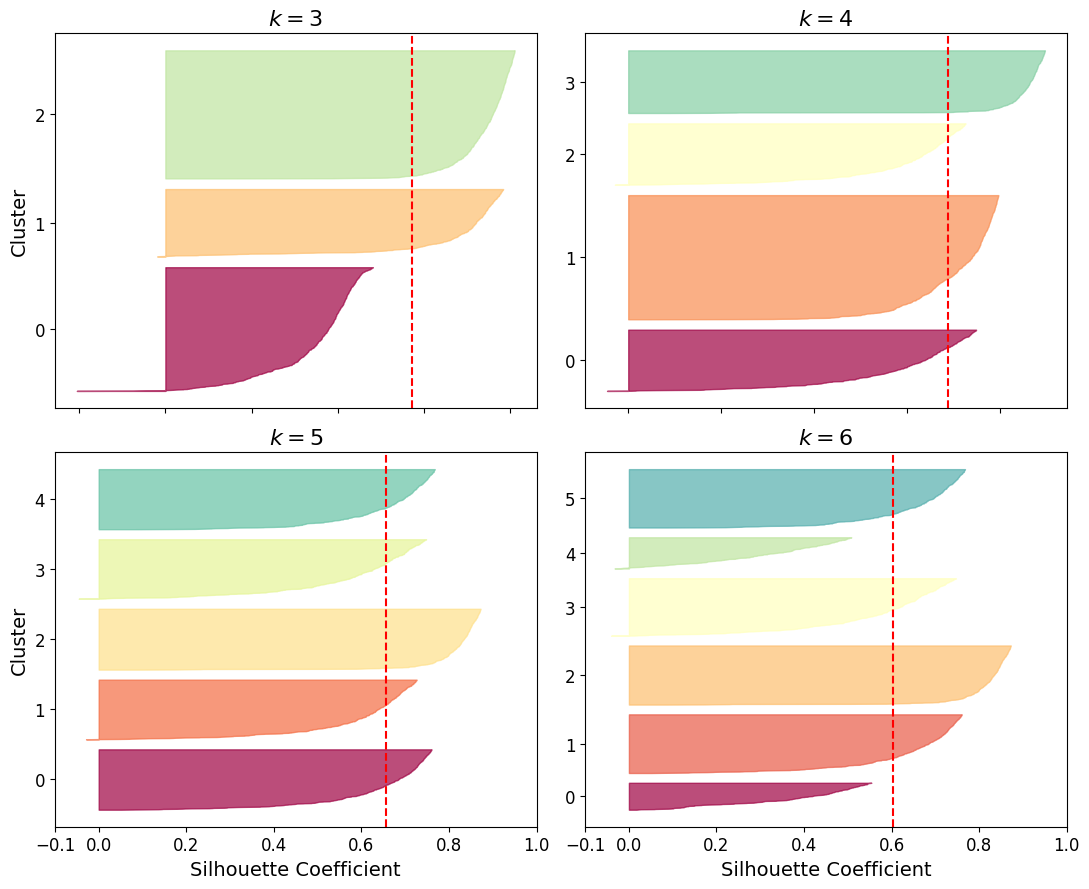

In [50]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 2].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()

### Limitaciones de Kmeans

Cuando tenemos los puntos muy concentrados y con formas no concéntricas, el algoritmo de k-means puede no funcionar bien

In [51]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

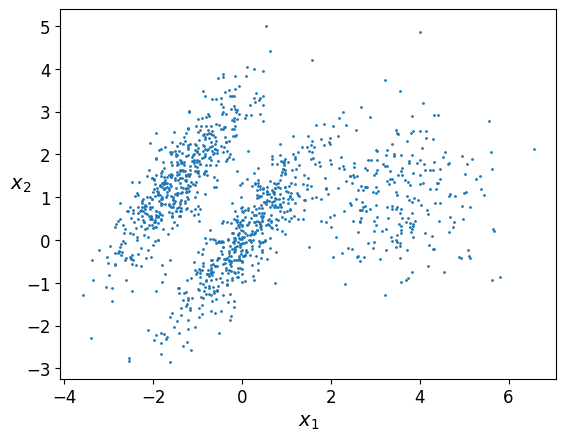

In [52]:
plot_clusters(X)

In [53]:
kmeans_good = KMeans(n_clusters = 3,
                    init = np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
                    n_init = 1,
                    random_state = 42)

kmeans_bad = KMeans(n_clusters=3, random_state=42)

kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

Saving figure bad_kmeans_plot


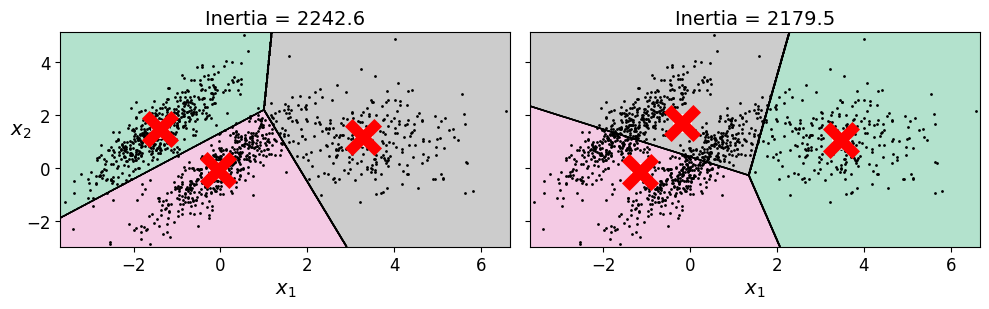

In [54]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

save_fig("bad_kmeans_plot")
plt.show()

## DBSCAN

https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [55]:
from sklearn.datasets import make_moons

In [56]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [57]:
from sklearn.cluster import DBSCAN

In [59]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [65]:
print(len(dbscan.core_sample_indices_)) # puntos core
print(np.unique(dbscan.labels_)) # clusters
print(dbscan.components_) # posición de los cores

808
[-1  0  1  2  3  4  5  6]
[[-0.02137124  0.40618608]
 [-0.84192557  0.53058695]
 [ 0.58930337 -0.32137599]
 ...
 [ 1.66258462 -0.3079193 ]
 [-0.94355873  0.3278936 ]
 [ 0.79419406  0.60777171]]


In [74]:
dbscan2 = DBSCAN(eps=0.25)
dbscan2.fit(X)

DBSCAN(eps=0.25)

In [75]:
print(len(dbscan2.core_sample_indices_)) # puntos core
print(np.unique(dbscan2.labels_)) # clusters

1000
[0 1]


In [77]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

Saving figure dbscan_plot


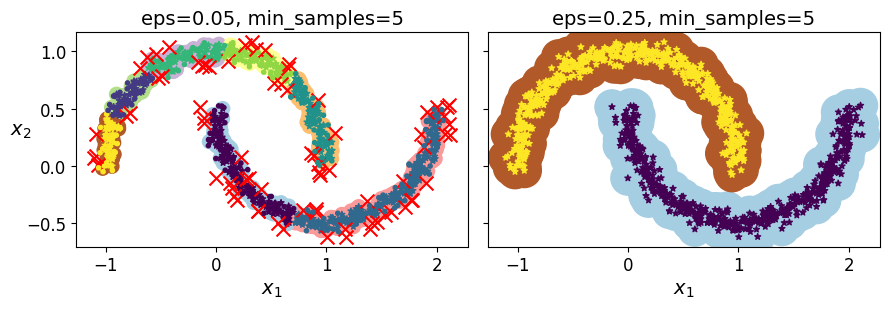

In [78]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

save_fig("dbscan_plot")
plt.show()


In [79]:
dbscan = dbscan2

#### DBSCAN Predictions

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
knn = KNeighborsClassifier(n_neighbors=50) # k-nearest-neighbors
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [84]:
X_new = np.array([[-0.5, 0],
                  [0, 0.5],
                  [1, -0.1],
                  [2, 1]])

knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [85]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

Saving figure cluster_classification_plot


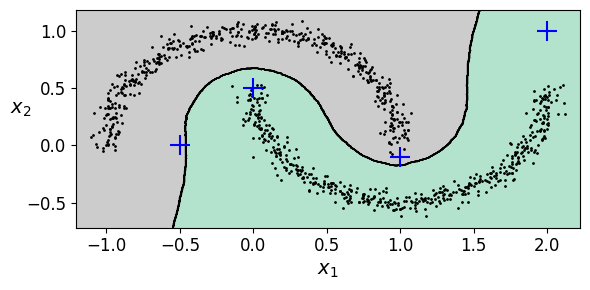

In [86]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
save_fig("cluster_classification_plot")
plt.show()

## Clustering  jerárquico

In [87]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import scale

In [88]:
def plot_dendrogram(model, **kwargs):
    '''
    Esta función extrae la información de un modelo AgglomerativeClustering
    y representa su dendograma con la función dendogram de scipy.cluster.hierarchy
    '''
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

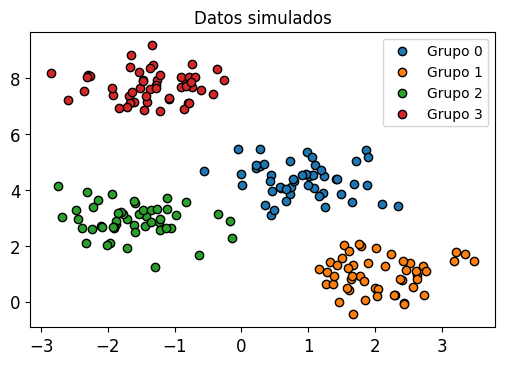

In [89]:
X, y = make_blobs(
        n_samples    = 200, 
        n_features   = 2, 
        centers      = 4, 
        cluster_std  = 0.60, 
        shuffle      = True, 
        random_state = 0
       )

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
for i in np.unique(y):
    ax.scatter(
        x = X[y == i, 0],
        y = X[y == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Grupo {i}"
    )
ax.set_title('Datos simulados')
ax.legend();

Con la clase `sklearn.cluster.AgglomerativeClustering` de Scikit-Learn se pueden entrenar modelos de clustering utilizando el algoritmo hierarchical clustering aglomerativo. Entre sus parámetros destacan:

- `n_clusters`: determina el número de clusters que se van a generar. En su lugar, su valor puede ser `None` si se quiere utilizar el criterio de distancia para crear los clusters o crecer todo el dendograma.

- `distance_threshold`: distancia (altura del dendograma) a partir de la cual se dejan de unir los clusters. Indicar `distance_threshold=0` para crecer todo el árbol.

Además, el parámetro `linkage` permite escoger cómo queremos calcular la ditancia entre clusters (single, complete o average)
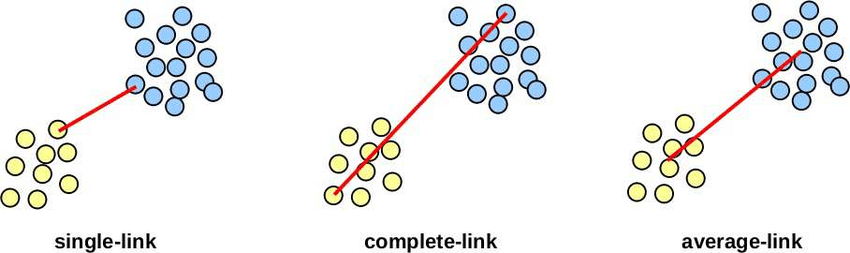

In [91]:
X_scaled = scale(X)
hclust = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
hclust.fit(X_scaled)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

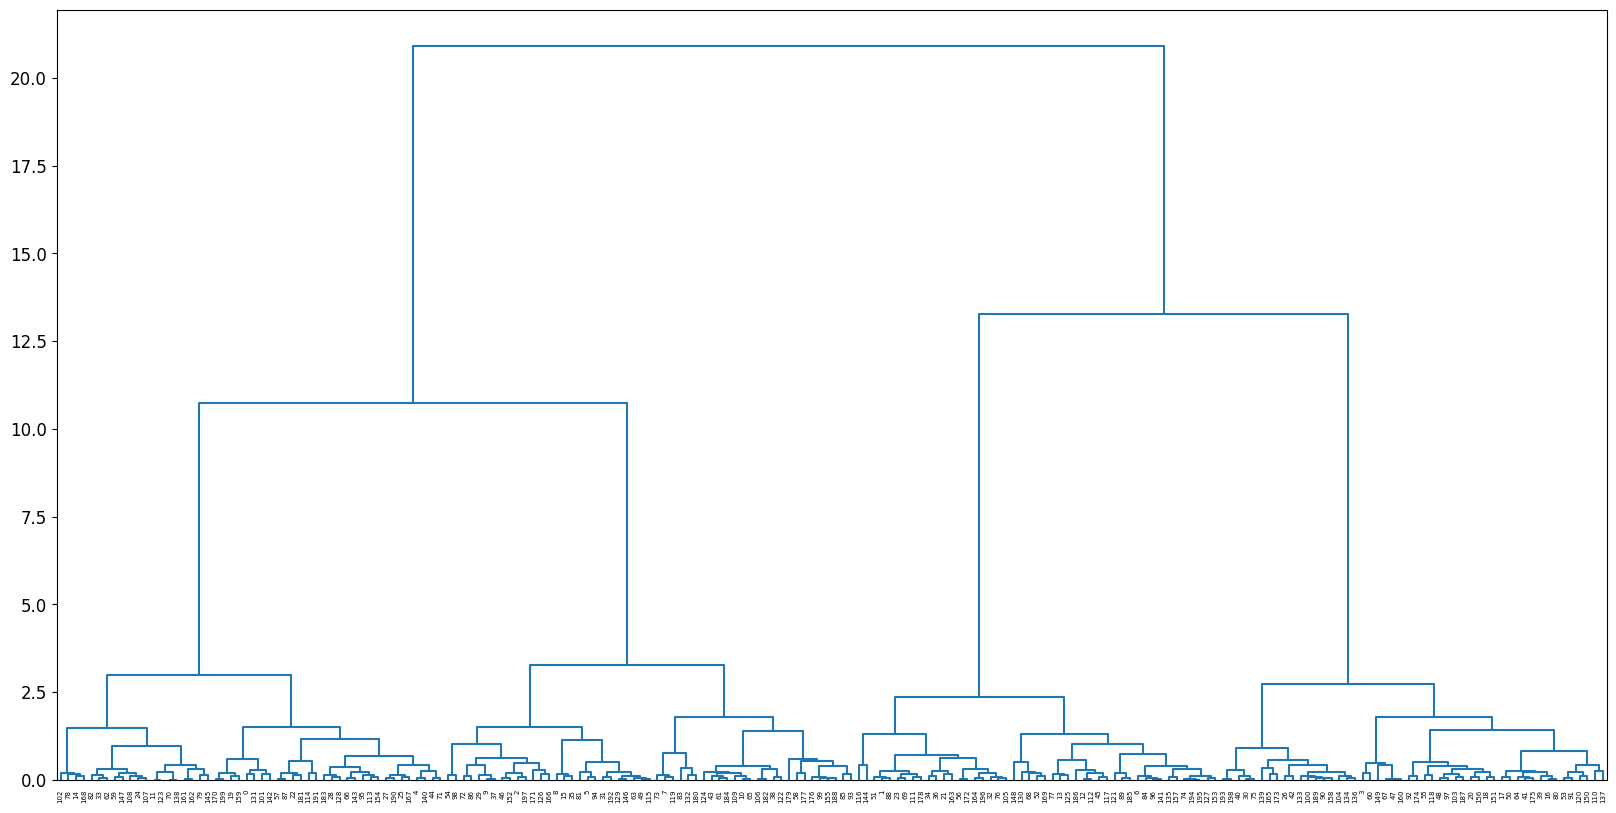

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
plot_dendrogram(hclust, color_threshold=0)

Una forma de identificar el número de clusters, es inspeccionar visualmente el dendograma y decidir a qué altura se corta para generar los clusters. Por ejemplo, para los resultados generados, parece sensato cortar el dendograma a una altura de entre 5 y 10, de forma que se creen 4 clusters.

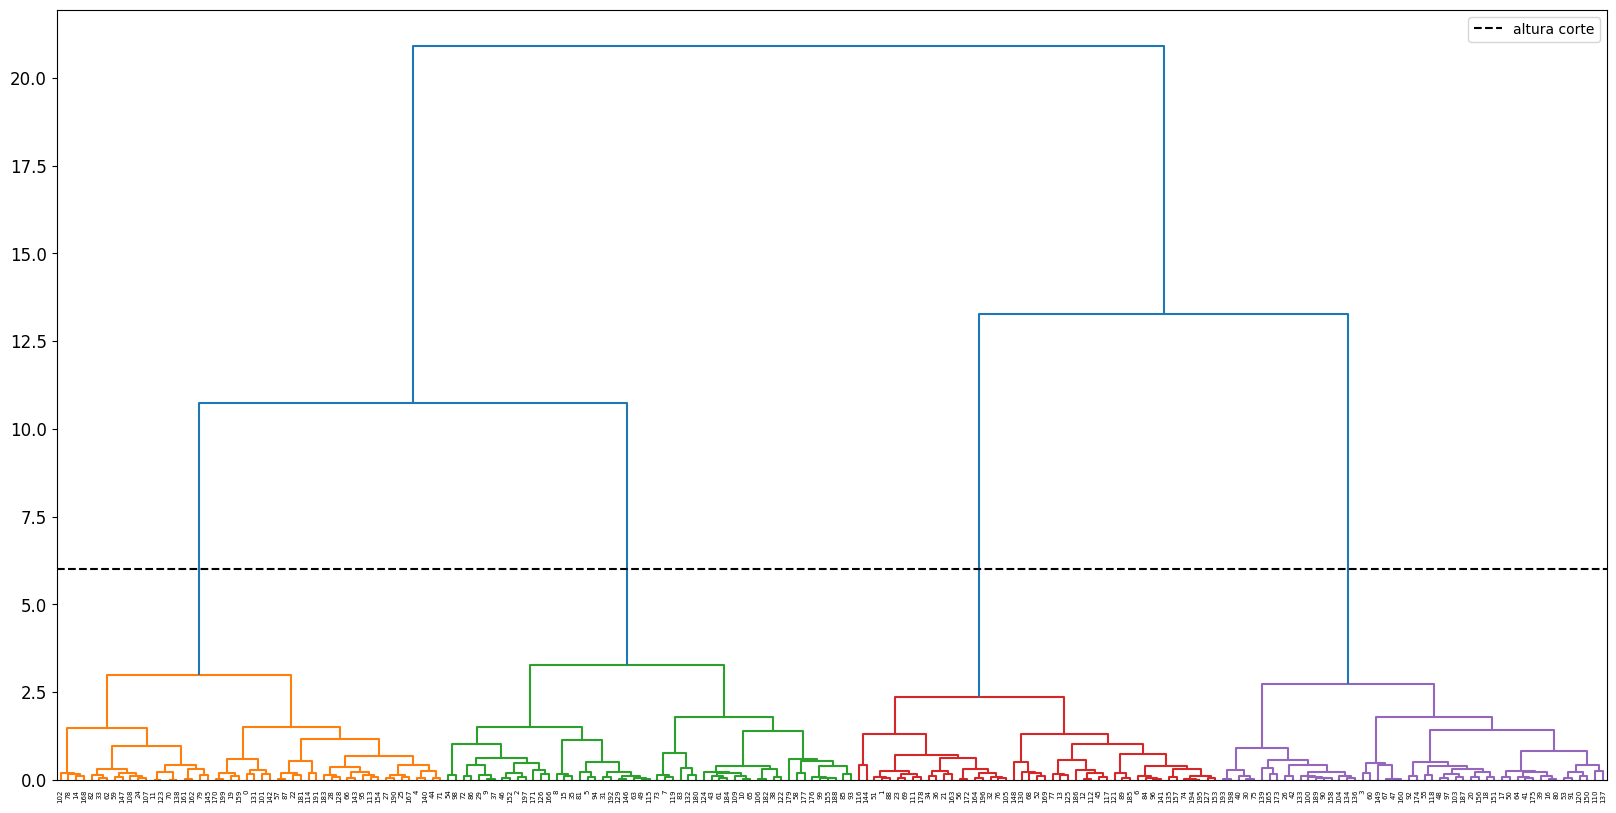

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
altura_corte = 6
plot_dendrogram(hclust, color_threshold=altura_corte, ax=ax)
ax.axhline(y=altura_corte, c = 'black', linestyle='--', label='altura corte')
ax.legend();

También podemos usar el coeficiente de *silhouette*

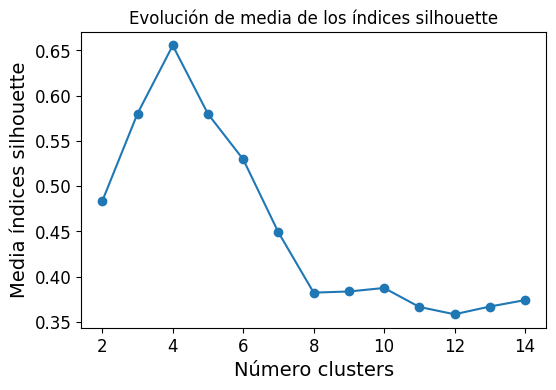

In [94]:
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

Una vez identificado el número óptimo de clusters, se reentrena el modelo indicando este valor.

In [95]:
modelo_hclust = AgglomerativeClustering(n_clusters=4)
modelo_hclust.fit(X=X_scaled)

AgglomerativeClustering(n_clusters=4)

In [97]:
modelo_hclust.fit_predict(X_scaled)

array([1, 2, 0, 3, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 3, 3, 3, 1, 3, 2,
       1, 2, 1, 1, 3, 1, 1, 0, 3, 0, 2, 1, 2, 0, 2, 0, 0, 3, 3, 3, 3, 0,
       1, 2, 0, 3, 3, 0, 3, 2, 2, 3, 0, 3, 2, 1, 0, 1, 3, 0, 1, 0, 3, 0,
       1, 3, 2, 2, 1, 1, 0, 0, 2, 3, 2, 2, 1, 1, 3, 0, 1, 0, 2, 0, 0, 1,
       2, 2, 3, 3, 3, 0, 0, 1, 2, 3, 0, 0, 3, 1, 1, 3, 3, 2, 0, 1, 1, 0,
       3, 2, 2, 1, 1, 0, 2, 2, 3, 0, 3, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1,
       0, 3, 3, 2, 3, 3, 1, 3, 1, 2, 1, 1, 2, 1, 0, 1, 2, 3, 3, 3, 0, 2,
       1, 0, 3, 2, 3, 1, 3, 1, 1, 2, 2, 3, 0, 1, 1, 2, 1, 0, 2, 3, 3, 3,
       0, 0, 2, 0, 0, 1, 0, 1, 0, 2, 2, 3, 0, 3, 1, 1, 0, 3, 2, 2, 2, 0,
       3, 1], dtype=int64)

Text(0.5, 1.0, 'Datos clustering jerárquico')

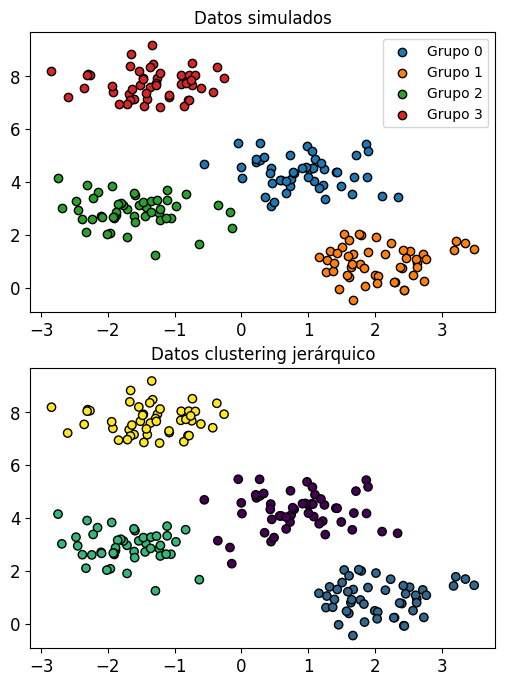

In [98]:
fig, ax = plt.subplots(2, 1, figsize=(6, 8))
for i in np.unique(y):
    ax[0].scatter(
        x = X[y == i, 0],
        y = X[y == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Grupo {i}"
    )
ax[0].set_title('Datos simulados')
ax[0].legend();
ax[1].scatter(X[:,0],X[:,1],c=modelo_hclust.fit_predict(X_scaled),edgecolor = 'black', ) 
ax[1].set_title('Datos clustering jerárquico')

In [101]:
modelo_hclust2 = AgglomerativeClustering(n_clusters=None,
                                        distance_threshold=2)

modelo_hclust2.fit(X=X_scaled)
modelo_hclust2.fit_predict(X_scaled)

array([1, 7, 4, 2, 1, 4, 3, 0, 4, 4, 0, 5, 3, 3, 5, 4, 2, 2, 2, 1, 2, 7,
       1, 7, 5, 1, 6, 1, 1, 4, 6, 4, 7, 5, 7, 4, 7, 4, 0, 2, 6, 2, 6, 0,
       1, 3, 4, 2, 2, 4, 2, 7, 3, 2, 4, 2, 7, 1, 0, 5, 2, 0, 5, 4, 2, 0,
       1, 2, 3, 7, 5, 1, 4, 0, 3, 6, 7, 3, 5, 5, 2, 4, 5, 0, 3, 0, 4, 1,
       7, 3, 6, 2, 2, 0, 4, 1, 3, 2, 4, 0, 6, 1, 5, 2, 6, 7, 0, 5, 5, 0,
       2, 7, 3, 1, 1, 4, 7, 3, 2, 0, 2, 3, 0, 5, 0, 3, 4, 3, 1, 4, 3, 1,
       0, 6, 6, 3, 6, 2, 5, 6, 1, 3, 1, 1, 7, 5, 4, 5, 3, 2, 2, 2, 4, 3,
       1, 0, 2, 3, 6, 1, 2, 5, 5, 7, 7, 6, 4, 1, 5, 3, 1, 4, 7, 6, 2, 2,
       0, 0, 7, 0, 0, 1, 0, 1, 0, 3, 3, 2, 0, 6, 1, 1, 4, 6, 3, 3, 7, 4,
       6, 1], dtype=int64)

Text(0.5, 1.0, 'Datos clustering jerárquico distancia = 2')

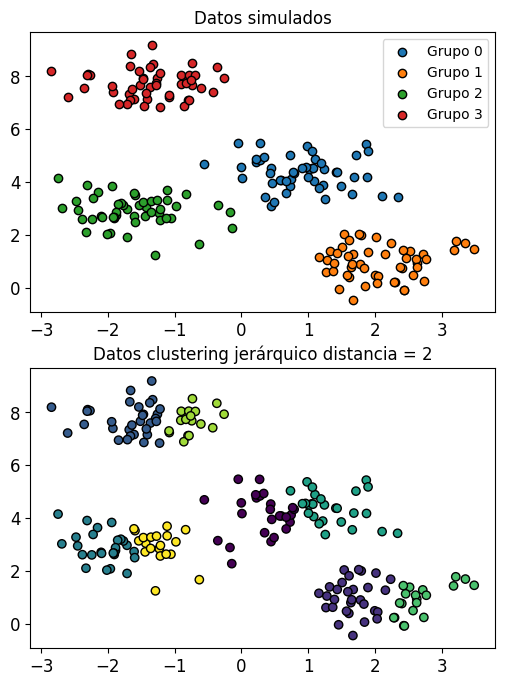

In [102]:
fig, ax = plt.subplots(2, 1, figsize=(6, 8))
for i in np.unique(y):
    ax[0].scatter(
        x = X[y == i, 0],
        y = X[y == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Grupo {i}"
    )
ax[0].set_title('Datos simulados')
ax[0].legend();
ax[1].scatter(X[:,0],X[:,1],c=modelo_hclust2.fit_predict(X_scaled),edgecolor = 'black', ) 
ax[1].set_title('Datos clustering jerárquico distancia = 2')